<a href="https://colab.research.google.com/github/nagolinc/notebooks/blob/main/Safety_Waifu_(v2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Display Web3 Address as Waifu

This notebooks was created by Logan Zoellner (@nagolinc, https://loganzoellner.com)

This notebook makes use of @AydaoAI's "This Anime Does not exist" (which you can read more about here: https://www.gwern.net/Faces#extended-stylegan2-danbooru2019-aydao).

And this notebook: https://colab.research.google.com/drive/1oxcJ1tbG77hlggdKd_d8h22nBcIZsLTL by @arfa

TADNE is under a CC BY-NC liscence.

Any code in this repository not otherwise liscenced is herein released under the MIT Liscence.

In [1]:
!nvidia-smi

Sun Feb 21 10:14:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!git clone https://github.com/shawwn/stylegan2 -b estimator /content/stylegan2

fatal: destination path '/content/stylegan2' already exists and is not an empty directory.


In [3]:
cd /content/

/content


In [4]:
import gdown, os

if not os.path.exists("/content/network-tadne.pkl"):
  #gdown.download('https://drive.google.com/uc?id=1qNhyusI0hwBLI-HOavkNP5I0J0-kcN4C', 'network-tadne.pkl', quiet=False)
  url='https://drive.google.com/uc?id=1LCkyOPmcWBsPlQX_DxKAuPM1Ew_nh83I'
  gdown.download(url, '/content/network-tadne.pkl', quiet=False)


In [5]:

!ls -lrt /content/network-tadne.pkl

-rw-r--r-- 1 root root 1056544230 Feb 21 10:01 /content/network-tadne.pkl


In [6]:
%tensorflow_version 1.x
%cd /content/stylegan2

TensorFlow 1.x selected.
/content/stylegan2


In [7]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import scipy



attach_debugger <function attach_debugger at 0x7f789c601bf8>
print_status <function print_status at 0x7f789c601f28>
freeze_forever <function freeze_forever at 0x7f789c600158>
quit <function quit at 0x7f789c601e18>
save_and_quit <function save_and_quit at 0x7f789c603268>
throw_exception <function throw_exception at 0x7f789c603510>


In [8]:
from tqdm.notebook import tqdm, trange

In [9]:
tflib.init_tf()
_G, _D, Gs = pickle.load(open("/content/network-tadne.pkl", "rb"))
# _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
# _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
# Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [10]:

!git clone https://github.com/nagolinc/stylegan2-pytorch.git /content/stylegan2-pytorch/

fatal: destination path '/content/stylegan2-pytorch' already exists and is not an empty directory.


In [11]:
!cd /content/stylegan2-pytorch/
!git pull

Already up to date.


In [12]:
import subprocess

CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
print("CUDA version:", CUDA_version)

if CUDA_version == "10.0":
    torch_version_suffix = "+cu100"
elif CUDA_version == "10.1":
    torch_version_suffix = "+cu101"
elif CUDA_version == "10.2":
    torch_version_suffix = ""
else:
    torch_version_suffix = "+cu110"

CUDA version: 10.1


In [13]:
!pip install ninja

In [14]:
! pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [15]:
%cd /content/stylegan2-pytorch


/content/stylegan2-pytorch


In [16]:
%cd /content/stylegan2-pytorch
from convert_weight import convertStyleGan2

/content/stylegan2-pytorch


In [17]:
#conver the model from tf to torch
ckpt, g, disc,g_train = convertStyleGan2(_G,_D,Gs)
latent_avg=ckpt["latent_avg"]

In [18]:
import torch

In [19]:
import matplotlib.pyplot as plt

In [20]:
def fmtImg(r):
    img = ((r+1)/2*256).clip(0,255).astype(np.uint8).transpose(1,2,0)
    return PIL.Image.fromarray(img, 'RGB')

In [21]:
seed="0x1f9840a85d5af5bf1d1762f925bdaddc4201f984"
arr=bytearray.fromhex(seed[2:])

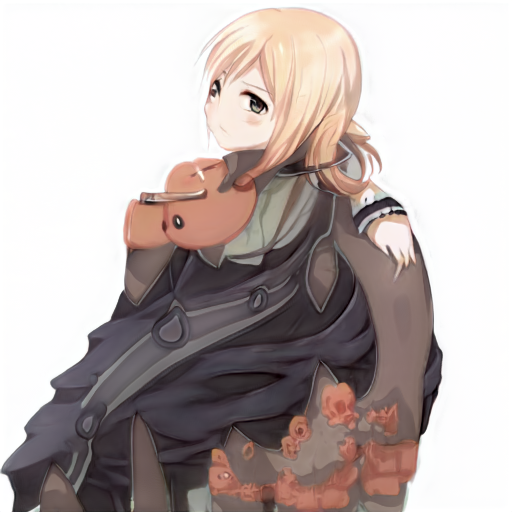

In [23]:
device='cuda'
n_sample=1

g = g.to(device)

inputSize=1024

z = np.random.RandomState(arr).randn(n_sample, inputSize).astype("float32")

with torch.no_grad():
    img_pt, _ = g(
        [torch.from_numpy(z).to(device)],
        truncation=0.25,
        truncation_latent=latent_avg.to(device),
        randomize_noise=False,
    )

display(fmtImg(img_pt.cpu().numpy()[0]))

In [24]:
!pip3 install jsonschema
!pip install Web3

In [25]:
import jsonschema
jsonschema.__version__

'3.2.0'

In [26]:
from web3 import Web3

In [ ]:
Web3.isAddress

#Safety Waifu (version 1)

In [33]:
def safetyWaifu(address):
  assert Web3.isAddress(address)
  arr=bytearray.fromhex(address[2:])
  z = np.random.RandomState(arr).randn(n_sample, inputSize).astype("float32")

  with torch.no_grad():
      img_pt, _ = g(
          [torch.from_numpy(z).to(device)],
          truncation=0.25,
          truncation_latent=latent_avg.to(device),
          randomize_noise=False,
      )
  return fmtImg(img_pt.cpu().numpy()[0])


Uniswap


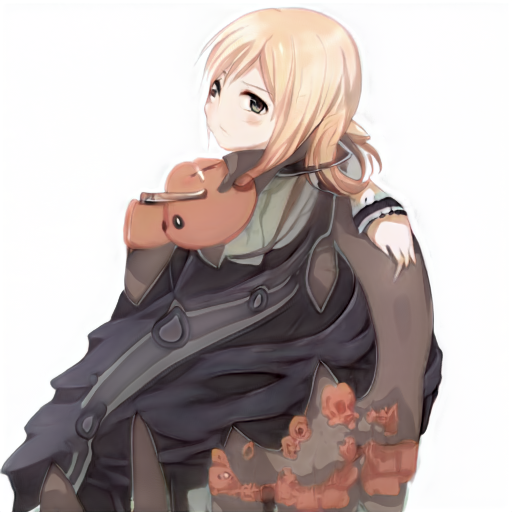

In [36]:
print("Uniswap")
display(safetyWaifu("0x1f9840a85d5af5bf1d1762f925bdaddc4201f984"))

1Inch


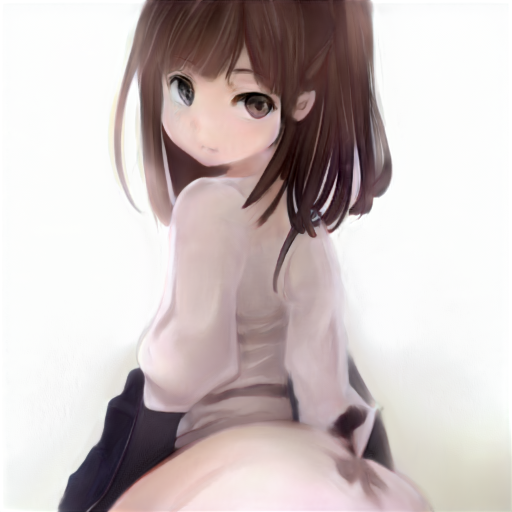

In [37]:
print("1Inch")
display(safetyWaifu("0x111111111117dc0aa78b770fa6a738034120c302"))

USDC


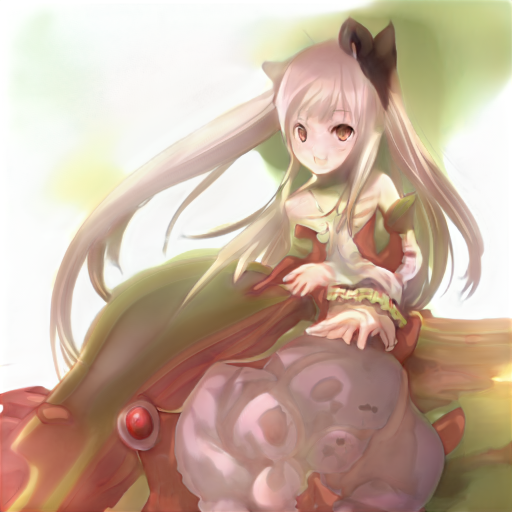

In [38]:
print("USDC")
display(safetyWaifu("0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"))

WETH


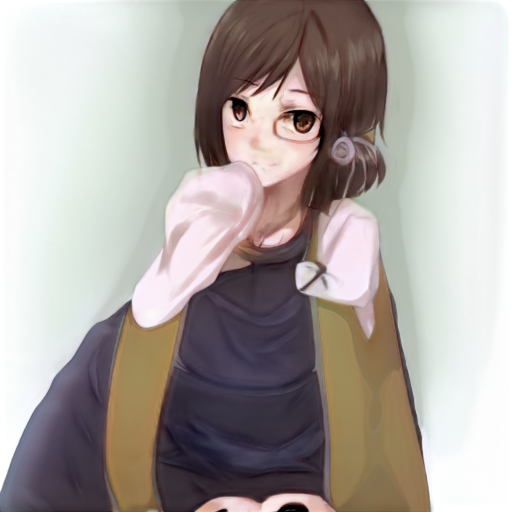

In [39]:
print("WETH")
display(safetyWaifu("0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"))

SNX


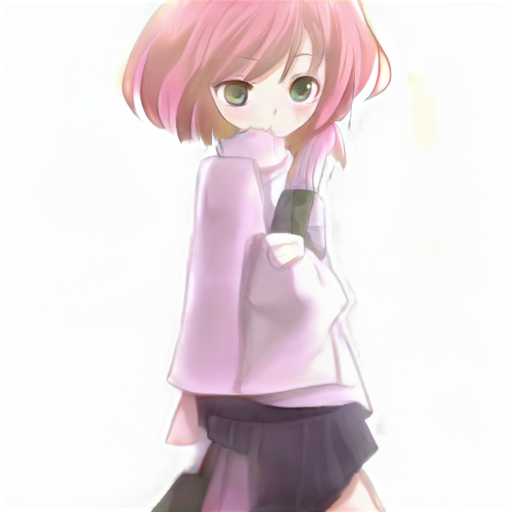

In [40]:
print("SNX")
display(safetyWaifu("0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f"))

BAL


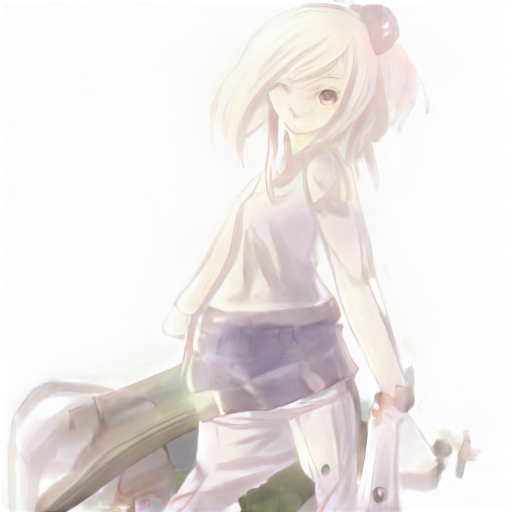

In [41]:
print("BAL")
display(safetyWaifu("0xba100000625a3754423978a60c9317c58a424e3d"))

YFI


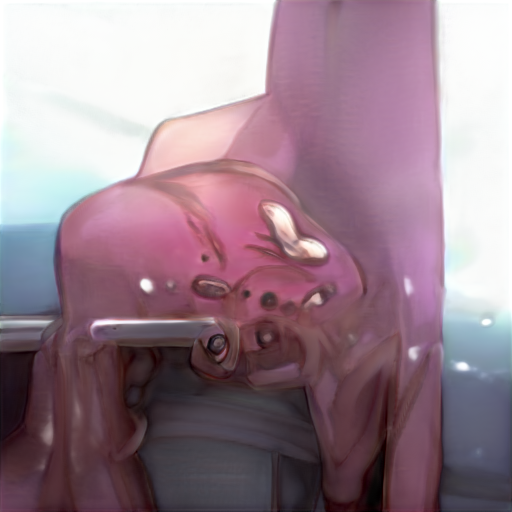

In [42]:
print("YFI")
display(safetyWaifu("0x0bc529c00C6401aEF6D220BE8C6Ea1667F6Ad93e"))

YAM


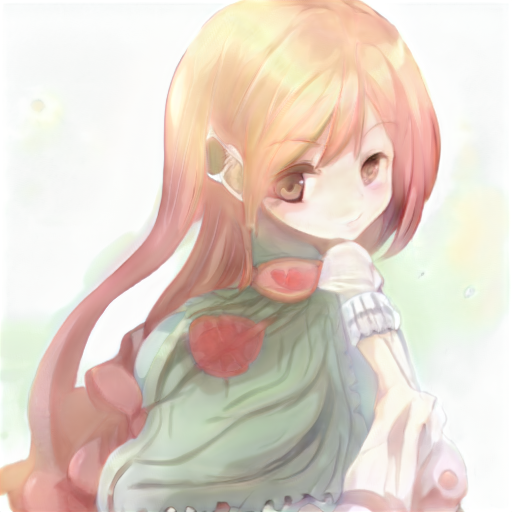

In [43]:
print("YAM")
display(safetyWaifu("0x0AaCfbeC6a24756c20D41914F2caba817C0d8521"))

#And now we import CLIP

In [51]:
MODELS = {
    "ViT-B/32":       "https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt",
}

In [52]:
! wget {MODELS["ViT-B/32"]} -O model.pt

--2021-02-21 10:39:17--  https://openaipublic.azureedge.net/clip/models/40d365715913c9da98579312b702a82c18be219cc2a73407c4526f58eba950af/ViT-B-32.pt
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.19, 13.107.213.19, 2620:1ec:bdf::19, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353976522 (338M) [application/octet-stream]
Saving to: ‘model.pt’

model.pt            100%[===================>] 337.58M   236MB/s    in 1.4s    

2021-02-21 10:39:19 (236 MB/s) - ‘model.pt’ saved [353976522/353976522]



In [53]:
model = torch.jit.load("model.pt").cuda().eval()
input_resolution = model.input_resolution.item()
context_length = model.context_length.item()
vocab_size = model.vocab_size.item()

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


# Image Preprocessing

We resize the input images and center-crop them to conform with the image resolution that the model expects. Before doing so, we will normalize the pixel intensity using the dataset mean and standard deviation.



In [54]:
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from PIL import Image

preprocess = Compose([
    Resize(input_resolution, interpolation=Image.BICUBIC),
    CenterCrop(input_resolution),
    ToTensor()
])

image_mean = torch.tensor([0.48145466, 0.4578275, 0.40821073]).cuda()
image_std = torch.tensor([0.26862954, 0.26130258, 0.27577711]).cuda()

# Text Preprocessing

We use a case-insensitive tokenizer. The tokenizer code is hidden in the second cell below

In [55]:
! pip install ftfy regex
! wget https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz -O bpe_simple_vocab_16e6.txt.gz

--2021-02-21 10:39:30--  https://openaipublic.azureedge.net/clip/bpe_simple_vocab_16e6.txt.gz
Resolving openaipublic.azureedge.net (openaipublic.azureedge.net)... 13.107.246.19, 13.107.213.19, 2620:1ec:bdf::19, ...
Connecting to openaipublic.azureedge.net (openaipublic.azureedge.net)|13.107.246.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1356917 (1.3M) [application/octet-stream]
Saving to: ‘bpe_simple_vocab_16e6.txt.gz’

bpe_simple_vocab_16 100%[===================>]   1.29M  --.-KB/s    in 0.05s   

2021-02-21 10:39:30 (25.7 MB/s) - ‘bpe_simple_vocab_16e6.txt.gz’ saved [1356917/1356917]



In [56]:
#@title

import gzip
import html
import os
from functools import lru_cache

import ftfy
import regex as re


@lru_cache()
def bytes_to_unicode():
    """
    Returns list of utf-8 byte and a corresponding list of unicode strings.
    The reversible bpe codes work on unicode strings.
    This means you need a large # of unicode characters in your vocab if you want to avoid UNKs.
    When you're at something like a 10B token dataset you end up needing around 5K for decent coverage.
    This is a signficant percentage of your normal, say, 32K bpe vocab.
    To avoid that, we want lookup tables between utf-8 bytes and unicode strings.
    And avoids mapping to whitespace/control characters the bpe code barfs on.
    """
    bs = list(range(ord("!"), ord("~")+1))+list(range(ord("¡"), ord("¬")+1))+list(range(ord("®"), ord("ÿ")+1))
    cs = bs[:]
    n = 0
    for b in range(2**8):
        if b not in bs:
            bs.append(b)
            cs.append(2**8+n)
            n += 1
    cs = [chr(n) for n in cs]
    return dict(zip(bs, cs))


def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def basic_clean(text):
    text = ftfy.fix_text(text)
    text = html.unescape(html.unescape(text))
    return text.strip()


def whitespace_clean(text):
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


class SimpleTokenizer(object):
    def __init__(self, bpe_path: str = "bpe_simple_vocab_16e6.txt.gz"):
        self.byte_encoder = bytes_to_unicode()
        self.byte_decoder = {v: k for k, v in self.byte_encoder.items()}
        merges = gzip.open(bpe_path).read().decode("utf-8").split('\n')
        merges = merges[1:49152-256-2+1]
        merges = [tuple(merge.split()) for merge in merges]
        vocab = list(bytes_to_unicode().values())
        vocab = vocab + [v+'</w>' for v in vocab]
        for merge in merges:
            vocab.append(''.join(merge))
        vocab.extend(['<|startoftext|>', '<|endoftext|>'])
        self.encoder = dict(zip(vocab, range(len(vocab))))
        self.decoder = {v: k for k, v in self.encoder.items()}
        self.bpe_ranks = dict(zip(merges, range(len(merges))))
        self.cache = {'<|startoftext|>': '<|startoftext|>', '<|endoftext|>': '<|endoftext|>'}
        self.pat = re.compile(r"""<\|startoftext\|>|<\|endoftext\|>|'s|'t|'re|'ve|'m|'ll|'d|[\p{L}]+|[\p{N}]|[^\s\p{L}\p{N}]+""", re.IGNORECASE)

    def bpe(self, token):
        if token in self.cache:
            return self.cache[token]
        word = tuple(token[:-1]) + ( token[-1] + '</w>',)
        pairs = get_pairs(word)

        if not pairs:
            return token+'</w>'

        while True:
            bigram = min(pairs, key = lambda pair: self.bpe_ranks.get(pair, float('inf')))
            if bigram not in self.bpe_ranks:
                break
            first, second = bigram
            new_word = []
            i = 0
            while i < len(word):
                try:
                    j = word.index(first, i)
                    new_word.extend(word[i:j])
                    i = j
                except:
                    new_word.extend(word[i:])
                    break

                if word[i] == first and i < len(word)-1 and word[i+1] == second:
                    new_word.append(first+second)
                    i += 2
                else:
                    new_word.append(word[i])
                    i += 1
            new_word = tuple(new_word)
            word = new_word
            if len(word) == 1:
                break
            else:
                pairs = get_pairs(word)
        word = ' '.join(word)
        self.cache[token] = word
        return word

    def encode(self, text):
        bpe_tokens = []
        text = whitespace_clean(basic_clean(text)).lower()
        for token in re.findall(self.pat, text):
            token = ''.join(self.byte_encoder[b] for b in token.encode('utf-8'))
            bpe_tokens.extend(self.encoder[bpe_token] for bpe_token in self.bpe(token).split(' '))
        return bpe_tokens

    def decode(self, tokens):
        text = ''.join([self.decoder[token] for token in tokens])
        text = bytearray([self.byte_decoder[c] for c in text]).decode('utf-8', errors="replace").replace('</w>', ' ')
        return text


In [61]:
_preprocess = torch.nn.Sequential(
    Resize(input_resolution, interpolation=Image.BICUBIC),
    CenterCrop(input_resolution),
)

def getScoringFunction(description,phi=1.0):
  #preprocess text
  texts=[description]  
  tokenizer = SimpleTokenizer()
  text_tokens = [tokenizer.encode("This is " + desc) for desc in texts]
  text_input = torch.zeros(len(text_tokens), model.context_length, dtype=torch.long)
  for i, tokens in enumerate(text_tokens):
      text_input[i, :len(tokens)] = torch.tensor(tokens)
  text_input = text_input.cuda()

  #this function takes a (latent) as input and returns a PIL image
  # latents can be generated using 
  # latent = np.random.RandomState(seed).randn(1, 1024)
  def displayLatent(latent,phi=phi):
    with torch.no_grad():
      img_pt, _ = g(
          [torch.from_numpy(latent).to(device)],
          truncation=phi,
          truncation_latent=latent_avg.to(device),
          randomize_noise=False,
      )
    img=img_pt.cpu().numpy()[0]
    return fmtImg(img)
  
  #this function takes a latent and returns a score and a derivative
  def scoreLatent(latent,phi=phi):
    _latent=torch.from_numpy(latent).to(device)
    #compute img array from latent
    img_pt, _ = g(
        [_latent],
        truncation=phi,
        truncation_latent=latent_avg.to(device),
        randomize_noise=False,
    )
    #pass through CLIP
    image_input = _preprocess(img_pt)
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_input).float()    
    #cosine
    image_features_n= image_features/image_features.norm(dim=-1, keepdim=True)
    text_features_n=text_features/text_features.norm(dim=-1, keepdim=True)
    similarity = text_features_n @ image_features_n.T
    score=similarity.detach().cpu().numpy()[0][0]
    return score

  return scoreLatent, displayLatent

In [67]:
scoreLatent,displayLatent=getScoringFunction("a picture of an anime girl")

In [68]:
from tqdm.notebook import tqdm,trange

#Safety Waifu 2 (Higher quality images!)

In [71]:
def safetyWaifu2(address,k=10):
  assert Web3.isAddress(address)
  arr=bytearray.fromhex(address[2:])
  rand=np.random.RandomState(arr)
  latents=[]
  scores=[]
  for i in trange(k):
    z = rand.randn(n_sample, inputSize).astype("float32")
    latents+=[z]
    scores+=[scoreLatent(z)]
  return displayLatent(latents[np.argmax(scores)])


Uniswap


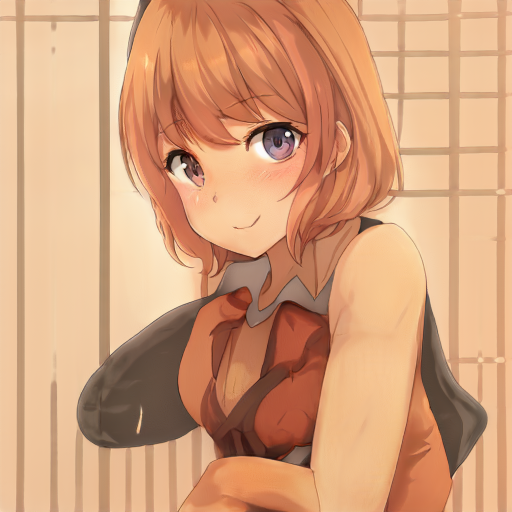

In [72]:
print("Uniswap")
display(safetyWaifu2("0x1f9840a85d5af5bf1d1762f925bdaddc4201f984"))

1Inch


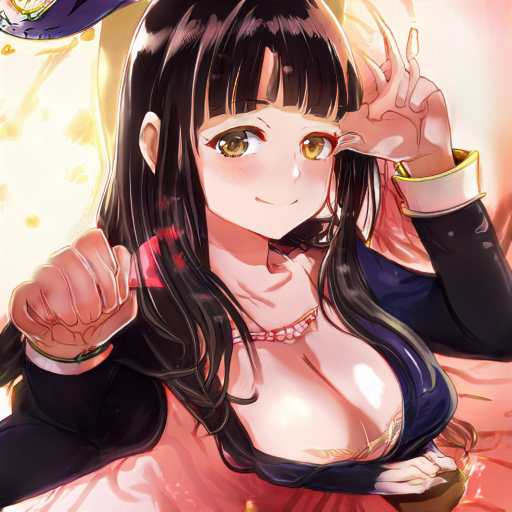

In [73]:
print("1Inch")
display(safetyWaifu2("0x111111111117dc0aa78b770fa6a738034120c302"))

USDC


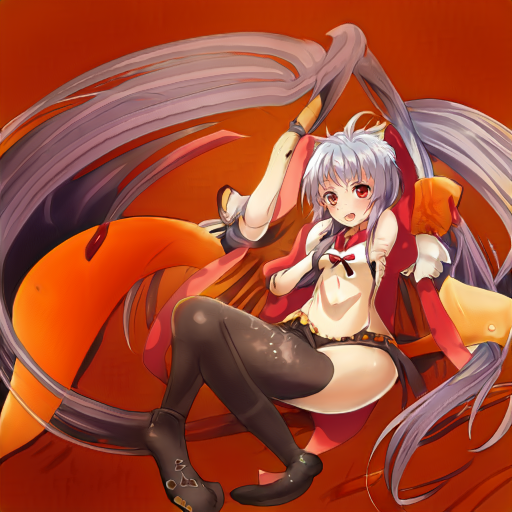

In [74]:
print("USDC")
display(safetyWaifu2("0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"))

WETH


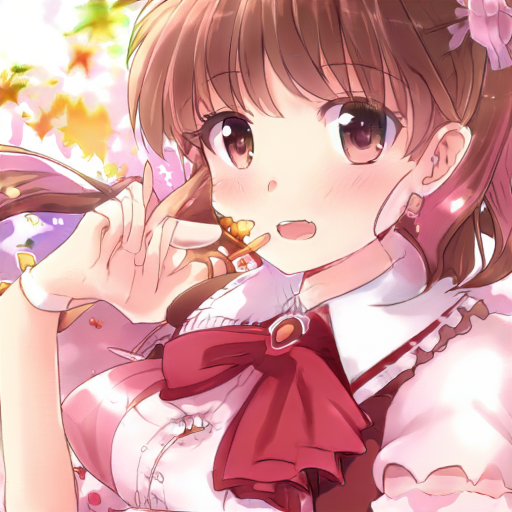

In [75]:
print("WETH")
display(safetyWaifu2("0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"))

SNX


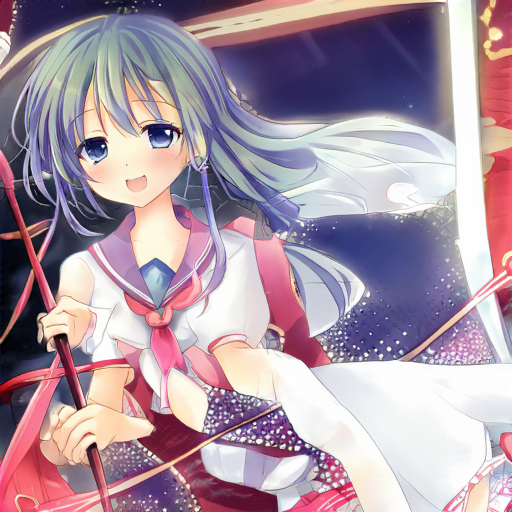

In [76]:
print("SNX")
display(safetyWaifu2("0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f"))

BAL


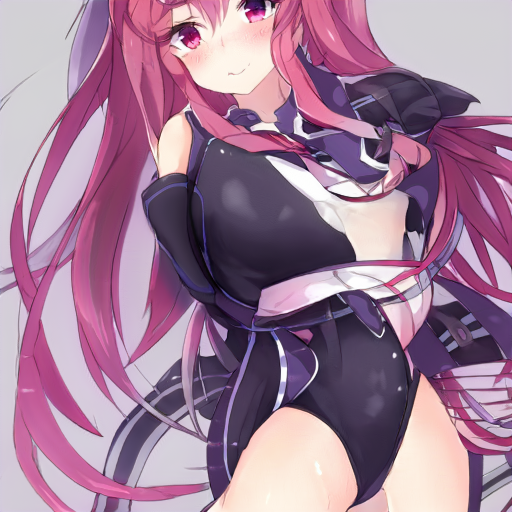

In [77]:
print("BAL")
display(safetyWaifu2("0xba100000625a3754423978a60c9317c58a424e3d"))

YFI


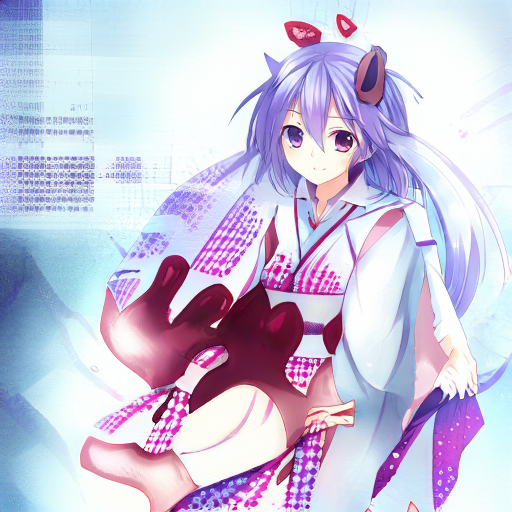

In [78]:
print("YFI")
display(safetyWaifu2("0x0bc529c00C6401aEF6D220BE8C6Ea1667F6Ad93e"))

YAM


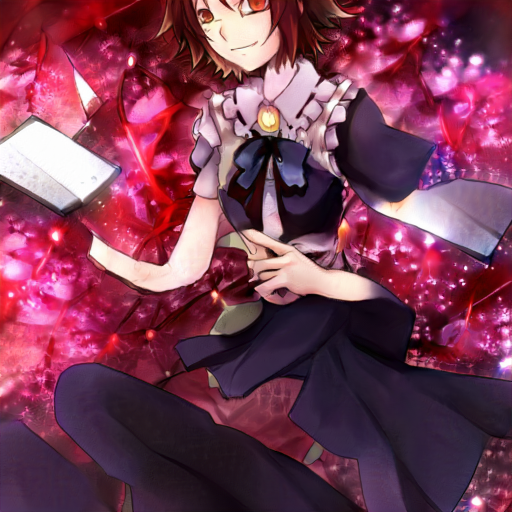

In [79]:
print("YAM")
display(safetyWaifu2("0x0AaCfbeC6a24756c20D41914F2caba817C0d8521"))